Project 2: First Machine Learning Model (Regression)
 Goal: Build a price prediction model using Airbnb dataset .

 Step 1: Load & Prepare Data
 Load dataset, check missing values
 Encode categorical variables
 Scale numerical features
 Split data into train-test

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
df = pd.read_csv("C:/Users/dell/Documents/GitHub/ML-Mastery/Datasets/Airbnb_NYC_cleaned.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Drop irrelevant columns
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1)

# Encode categorical variables
categorical_columns = ['neighbourhood_group', 'room_type', 'neighbourhood']  # Add 'neighbourhood' to categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify all columns are numeric
print("Data types:\n", df.dtypes)

# Select features and target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values:
 id                                 0
name                               6
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64
Data types:
 latitude                         float64
longitude                        float64
price                              int64
minimum_nights                     int64
number_of_reviews                  int64
                                  ...   
neighbourhood_Willowbrook           bool
neighbourhood_Windsor Terrace       bool
neighbourhood_Woodhaven             b

 Step 2: Train a Machine Learning Model
 Tasks:
 Train a Linear Regression & Random Forest model
 Evaluate performance using R², MAE, RMSE
 Compare models

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)  # Train the model
y_pred_lr = lr.predict(X_test_scaled)  # Make predictions

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)  # Train the model
y_pred_rf = rf.predict(X_test_scaled)  # Make predictions

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📌 {model_name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Random Forest Regressor
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


📌 Linear Regression Performance:
R² Score: 0.17
Mean Absolute Error (MAE): 59.56
Root Mean Squared Error (RMSE): 166.96

📌 Random Forest Regressor Performance:
R² Score: 0.13
Mean Absolute Error (MAE): 53.81
Root Mean Squared Error (RMSE): 170.76


Step 3: Visualize Predictions
Tasks:
Plot actual vs. predicted prices
Showing feature importance for Random Forest

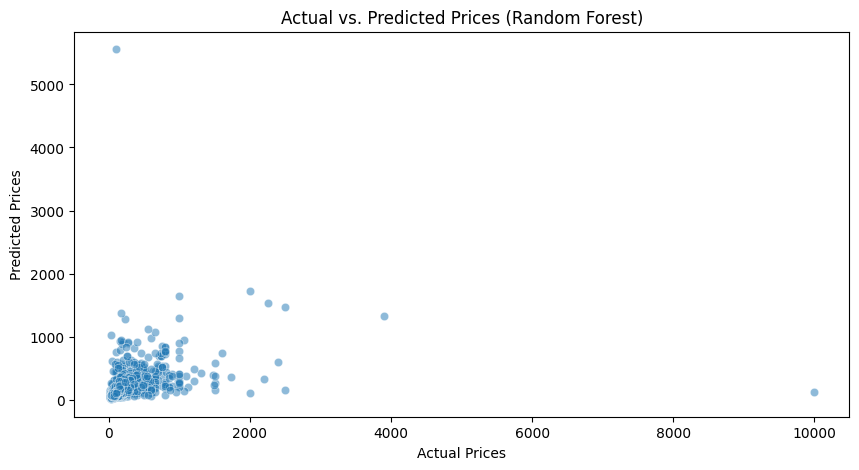

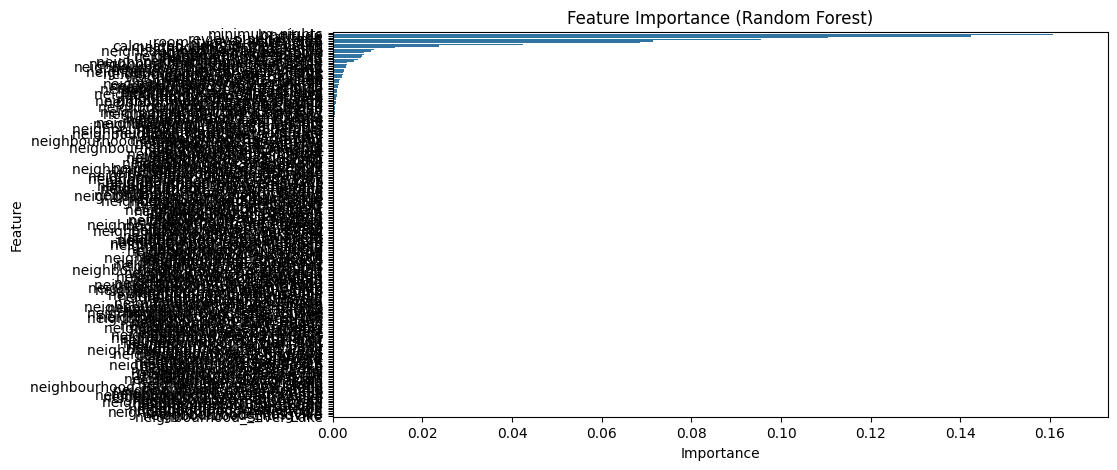

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Random Forest)")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance (Random Forest)")
plt.show()
